In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv(r'.\heart.csv')  # Replace with your file path

# Inspect unique values
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].unique())
    print("-" * 50)

# Handle categorical variables
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['ChestPainType'] = df['ChestPainType'].map({'ASY': 0, 'NAP': 1, 'ATA': 2})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df["ST_Slope"].map({'Up': 1, 'Down': -1, "Flat": 0})

df['RestingECG'].fillna(df['RestingECG'].median(), inplace=True)
df['ChestPainType'].fillna(df['ChestPainType'].median(), inplace=True)

X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

display(df.isnull().sum())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

display(X_train)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Train Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Evaluate Decision Tree
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_tree))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Column: Age
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
--------------------------------------------------
Column: Sex
['M' 'F']
--------------------------------------------------
Column: ChestPainType
['ATA' 'NAP' 'ASY' 'TA']
--------------------------------------------------
Column: RestingBP
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
--------------------------------------------------
Column: Cholesterol
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 18

C:\Users\nik85\AppData\Local\Temp\ipykernel_21628\3926222373.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingECG'].fillna(df['RestingECG'].median(), inplace=True)
C:\Users\nik85\AppData\Local\Temp\ipykernel_21628\3926222373.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

array([[-1.22099397,  0.51595242,  0.51160813, ..., -0.8235563 ,
        -0.08195566, -2.24427006],
       [-1.85743145,  0.51595242,  0.51160813, ..., -0.8235563 ,
        -0.83243239,  1.05211381],
       [ 0.2640268 ,  0.51595242, -0.76117307, ...,  1.21424608,
         0.10566353, -0.59607813],
       ...,
       [ 0.68831845,  0.51595242, -0.76117307, ...,  1.21424608,
         0.4809019 ,  1.05211381],
       [ 0.68831845,  0.51595242, -0.76117307, ...,  1.21424608,
        -0.83243239,  1.05211381],
       [-1.4331398 , -1.93816322, -0.76117307, ..., -0.8235563 ,
         1.04375945, -0.59607813]])

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

KNN Confusion Matrix:
[[67 10]
 [17 90]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        77
           1       0.84      0.81      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184

Decision Tree Confusion Matrix:
[[61 16]
 [20 87]]


C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\nik85\AppData\Local\Temp\ipykernel_21628\3619390940.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingECG'].fillna(df['RestingECG'].median(), inplace=True)
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\numpy\lib\_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, ax


Распределение целевой переменной:
Cholesterol
0.0    172
Name: count, dtype: int64


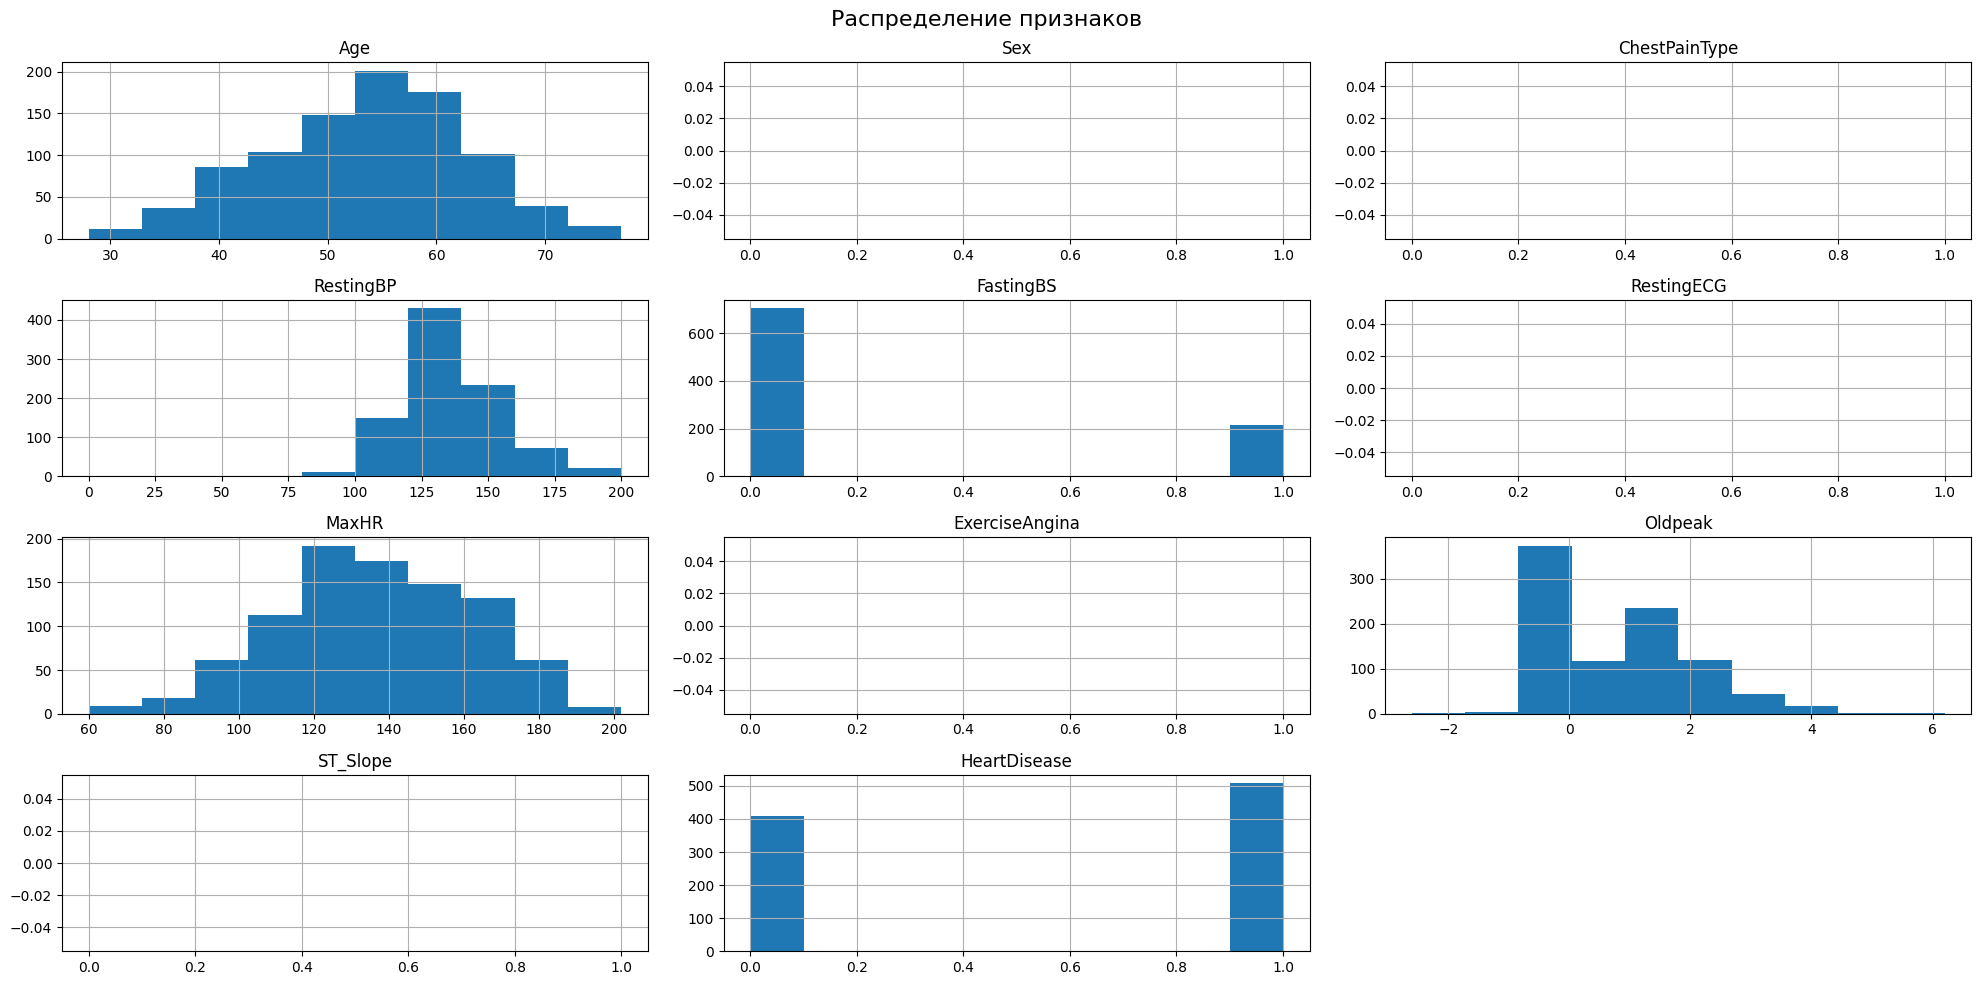

C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\nik85\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [33]:
df['Sex'] = df['Sex'].map({'F': 0, 'M': 1})
df['ChestPainType'] = df['ChestPainType'].map({'ASY': 0, 'NAP': 1, 'ATA': 2})
df['RestingECG'] = df['RestingECG'].map({'Normal': 0, 'ST': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df["ST_Slope"].map({'Up': 1, 'Down': -1, "Flat": 0})

df['RestingECG'].fillna(df['RestingECG'].median(), inplace=True)
df['ChestPainType'].fillna(df['ChestPainType'].median(), inplace=True)

# 4. Анализ распределения целевой переменной
print("\nРаспределение целевой переменной:")
print(df['Cholesterol'].value_counts())

# 5. Визуализация распределения признаков
df.drop('Cholesterol', axis=1).hist(figsize=(20, 10))
plt.suptitle('Распределение признаков', fontsize=16)
plt.tight_layout()
plt.show()

# 6. Разделение данных на признаки (X) и целевую переменную (y)
X = df.drop('Cholesterol', axis=1)
y = df['Cholesterol']

# 7. Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 8. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 9. Обучение модели KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# 10. Обучение модели Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# 11. Оценка модели KNN
print("\nОтчет классификации для KNN:")
print(classification_report(y_test, y_pred_knn))
print("Матрица путаницы для KNN:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('Матрица путаницы для KNN')
plt.xlabel('Предсказанное значение')
plt.ylabel('Правильное значение')
plt.show()

# 12. Оценка модели Decision Tree
print("\nОтчет классификации для Decision Tree:")
print(classification_report(y_test, y_pred_dt))
print("Матрица путаницы для Decision Tree:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Матрица путаницы для Decision Tree')
plt.xlabel('Предсказанное значение')
plt.ylabel('Правильное значение')
plt.show()

# 13. Сравнение точности моделей
knn_accuracy = (y_pred_knn == y_test).mean()
dt_accuracy = (y_pred_dt == y_test).mean()

print("\nСравнение точности моделей:")
print(f"Точность KNN: {knn_accuracy:.2f}")
print(f"Точность Decision Tree: {dt_accuracy:.2f}")

# 14. Визуализация дерева решений
plt.figure(figsize=(18, 8))
plt.plot_tree(dt_model, filled=True, rounded=True, feature_names=X.columns, class_names=["Healthy", "Diseased"])
plt.title('Визуализация дерева решений', fontsize=16)
plt.show()

Feature Statistics:
radius_mean: Mean = 14.13, Mode = 12.34
texture_mean: Mean = 19.29, Mode = 14.93
area_mean: Mean = 654.89, Mode = 512.2
smoothness_mean: Mean = 0.10, Mode = 0.1007
compactness_mean: Mean = 0.10, Mode = 0.1147
concavity_mean: Mean = 0.09, Mode = 0.0
concave points_mean: Mean = 0.05, Mode = 0.0
symmetry_mean: Mean = 0.18, Mode = 0.1601
fractal_dimension_mean: Mean = 0.06, Mode = 0.05667
radius_se: Mean = 0.41, Mode = 0.2204
texture_se: Mean = 1.22, Mode = 0.8561
area_se: Mean = 40.34, Mode = 16.64
smoothness_se: Mean = 0.01, Mode = 0.00508
compactness_se: Mean = 0.03, Mode = 0.01104
concavity_se: Mean = 0.03, Mode = 0.0
concave points_se: Mean = 0.01, Mode = 0.0
symmetry_se: Mean = 0.02, Mode = 0.01344
fractal_dimension_se: Mean = 0.00, Mode = 0.001784
radius_worst: Mean = 16.27, Mode = 12.36
texture_worst: Mean = 25.68, Mode = 17.7
area_worst: Mean = 880.58, Mode = 284.4
smoothness_worst: Mean = 0.13, Mode = 0.1216
compactness_worst: Mean = 0.25, Mode = 0.1486
concav

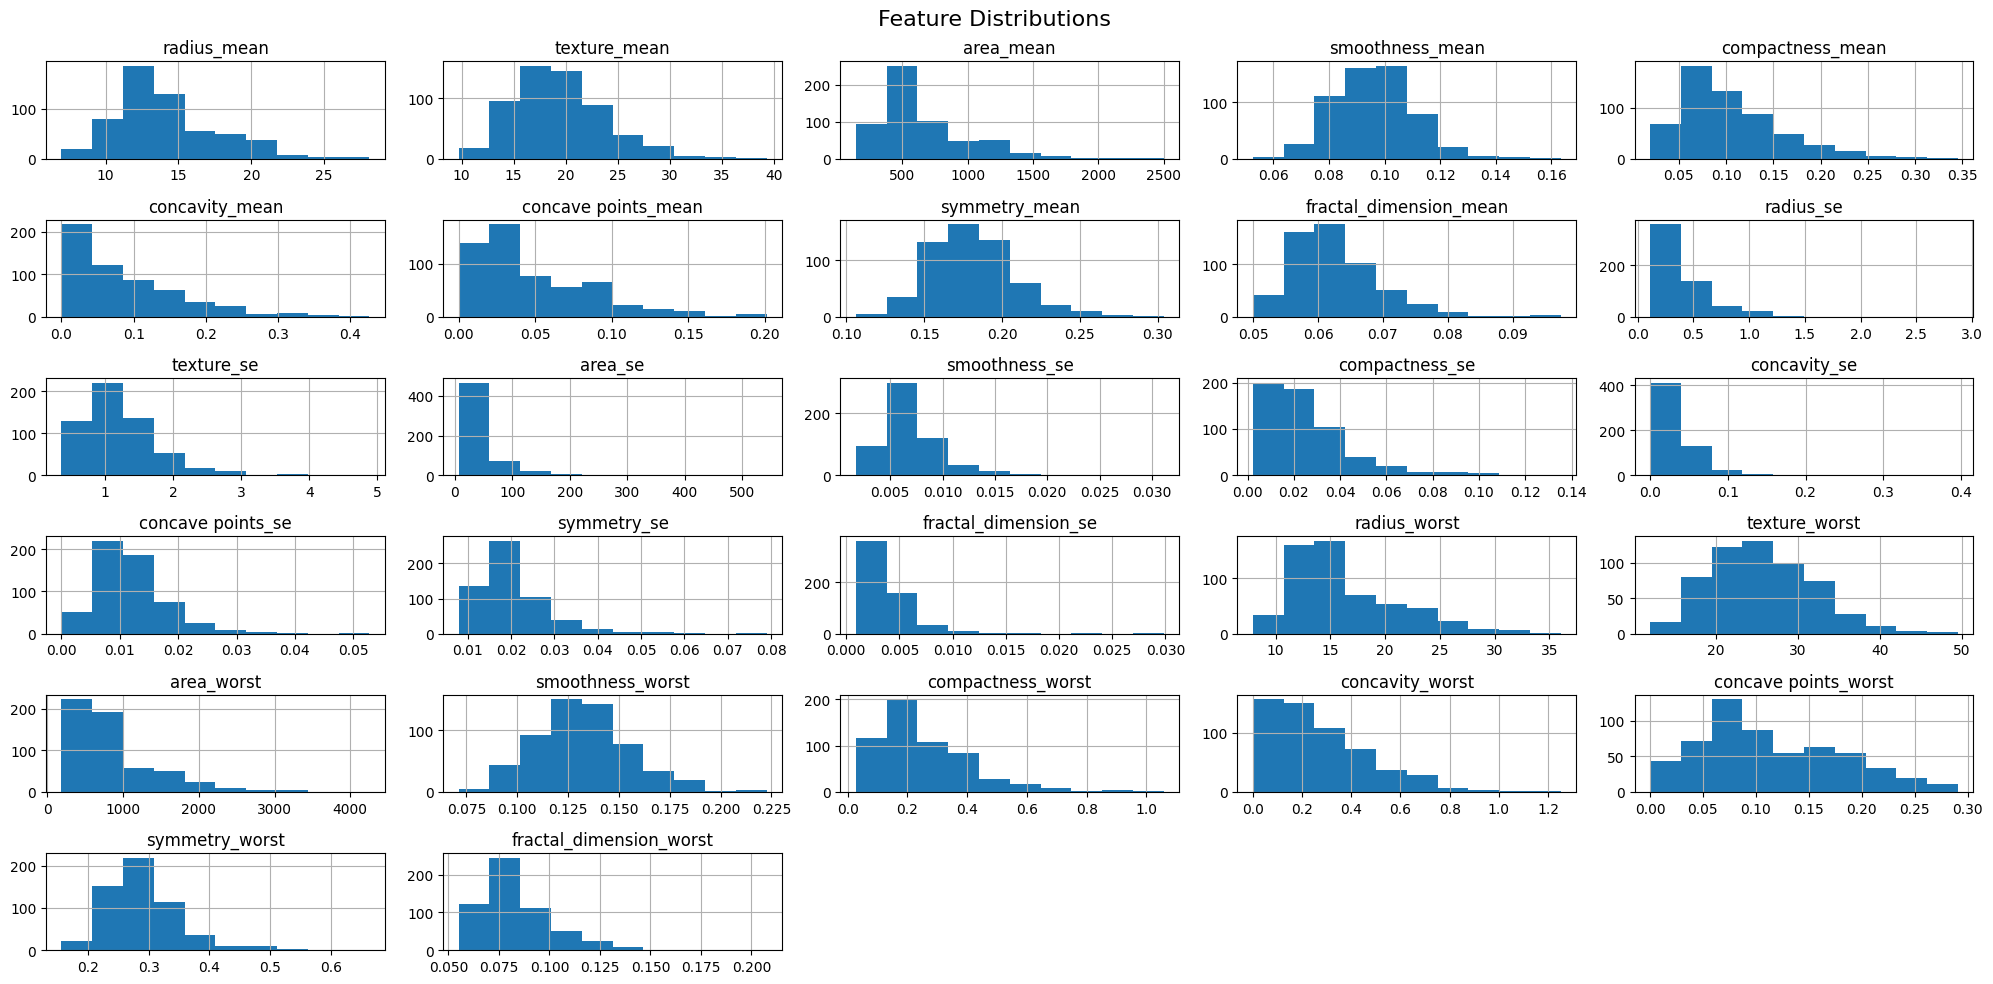


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

KNN Confusion Matrix:


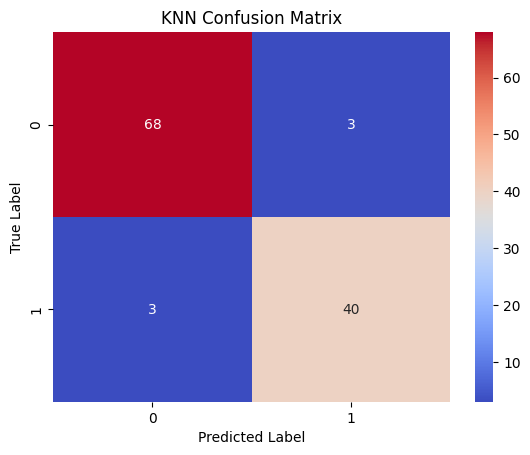


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

Decision Tree Confusion Matrix:


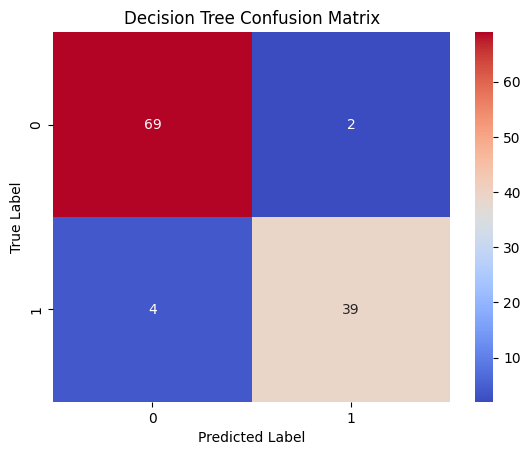


Ð¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· Ð¼Ð¾Ð´ÐµÐ»ÐµÐ¹:
KNN Accuracy: 0.95
Decision Tree Accuracy: 0.95


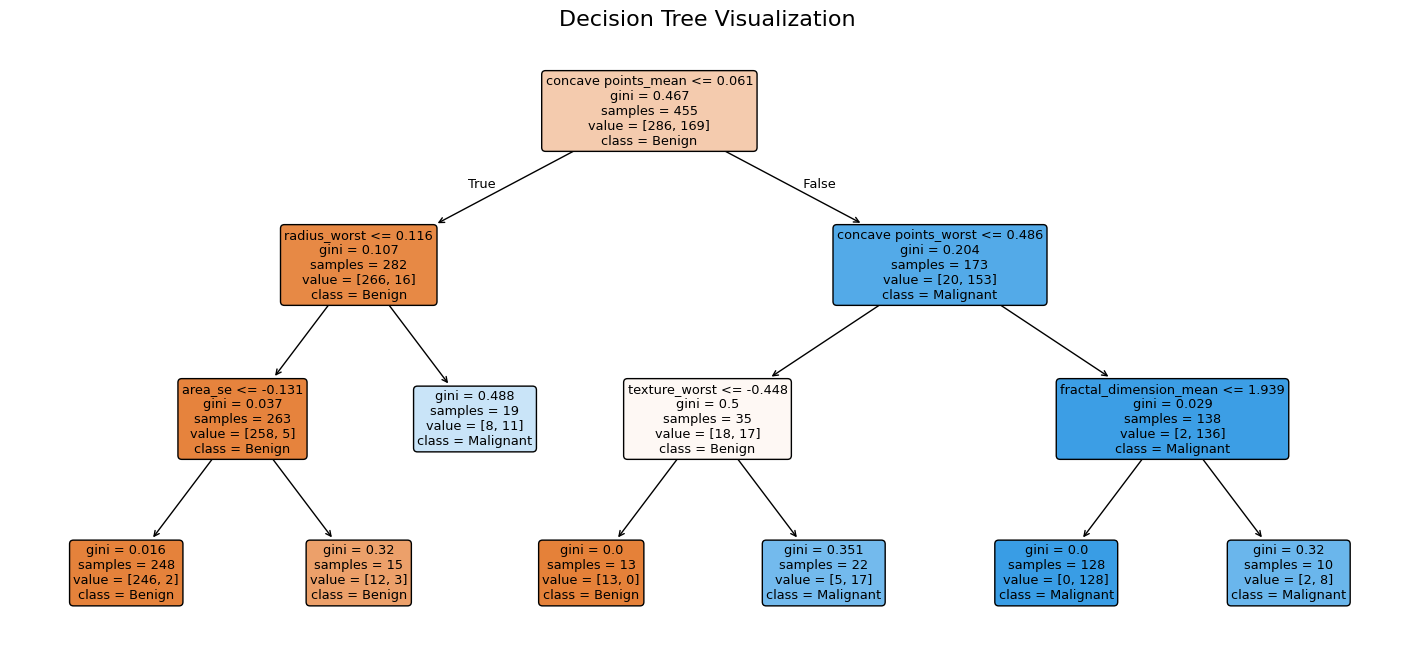

In [12]:
# Ð—Ð°Ð³Ñ€ÑƒÐ·ÐºÐ° Ð´Ð°Ð½Ð½Ñ‹Ñ…
df = pd.read_csv(r'C:\Users\tmas2\breast-cancer.csv')

# Ð£Ð´Ð°Ð»ÐµÐ½Ð¸Ðµ ÑÑ‚Ð¾Ð»Ð±Ñ†Ð¾Ð²
columns_to_drop = [
    'id',                  
    'perimeter_mean',     
    'perimeter_worst',    
    'perimeter_se'         
]

df = df.drop(columns=columns_to_drop)

# ÐŸÑ€ÐµÐ¾Ð±Ñ€Ð°Ð·Ð¾Ð²Ð°Ð½Ð¸Ðµ Ñ†ÐµÐ»ÐµÐ²Ð¾Ð¹ Ð¿ÐµÑ€ÐµÐ¼ÐµÐ½Ð½Ð¾Ð¹ 'diagnosis' Ð² Ñ‡Ð¸ÑÐ»Ð¾Ð²Ð¾Ð¹ Ñ„Ð¾Ñ€Ð¼Ð°Ñ‚
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Ð’Ñ‹Ð²Ð¾Ð´ ÑÑ‚Ð°Ñ‚Ð¸ÑÑ‚Ð¸ÐºÐ¸ Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¾Ð²
print("Feature Statistics:")
for col in df.columns:
    if col != 'diagnosis':
        print(f"{col}: Mean = {df[col].mean():.2f}, Mode = {df[col].mode()[0]}")

# Ð“Ð¸ÑÑ‚Ð¾Ð³Ñ€Ð°Ð¼Ð¼Ñ‹ Ð´Ð»Ñ Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¾Ð²
df.drop('diagnosis', axis=1).hist(figsize=(20, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Ð Ð°Ð·Ð´ÐµÐ»ÐµÐ½Ð¸Ðµ Ð´Ð°Ð½Ð½Ñ‹Ñ… Ð½Ð° Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¸ (X) Ð¸ Ñ†ÐµÐ»ÐµÐ²ÑƒÑŽ Ð¿ÐµÑ€ÐµÐ¼ÐµÐ½Ð½ÑƒÑŽ (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# ÐÐ¾Ñ€Ð¼Ð°Ð»Ð¸Ð·Ð°Ñ†Ð¸Ñ Ð´Ð°Ð½Ð½Ñ‹Ñ…
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ð Ð°Ð·Ð´ÐµÐ»ÐµÐ½Ð¸Ðµ Ð´Ð°Ð½Ð½Ñ‹Ñ… Ð½Ð° Ð¾Ð±ÑƒÑ‡Ð°ÑŽÑ‰ÑƒÑŽ Ð¸ Ñ‚ÐµÑÑ‚Ð¾Ð²ÑƒÑŽ Ð²Ñ‹Ð±Ð¾Ñ€ÐºÐ¸
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ÐœÐ¾Ð´ÐµÐ»ÑŒ KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# ÐœÐ¾Ð´ÐµÐ»ÑŒ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# ÐžÑ†ÐµÐ½ÐºÐ° Ð¼Ð¾Ð´ÐµÐ»Ð¸ KNN
print("\nKNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='coolwarm')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ÐžÑ†ÐµÐ½ÐºÐ° Ð¼Ð¾Ð´ÐµÐ»Ð¸ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ð¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· Ð¼Ð¾Ð´ÐµÐ»ÐµÐ¹
knn_accuracy = (y_pred_knn == y_test).mean()
dt_accuracy = (y_pred_dt == y_test).mean()

print("\nÐ¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· Ð¼Ð¾Ð´ÐµÐ»ÐµÐ¹:")
print(f"KNN Accuracy: {knn_accuracy:.2f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

# Ð’Ð¸Ð·ÑƒÐ°Ð»Ð¸Ð·Ð°Ñ†Ð¸Ñ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
plt.figure(figsize=(18, 8))
plot_tree(dt_model, filled=True, rounded=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()


In [13]:
print(X.iloc[:, 15].head())

0    0.01587
1    0.01340
2    0.02058
3    0.01867
4    0.01885
Name: concave points_se, dtype: float64


Feature Statistics:
radius_mean: Mean = 14.13, Mode = 12.34
texture_mean: Mean = 19.29, Mode = 14.93
area_mean: Mean = 654.89, Mode = 512.2
smoothness_mean: Mean = 0.10, Mode = 0.1007
compactness_mean: Mean = 0.10, Mode = 0.1147
concavity_mean: Mean = 0.09, Mode = 0.0
concave points_mean: Mean = 0.05, Mode = 0.0
symmetry_mean: Mean = 0.18, Mode = 0.1601
fractal_dimension_mean: Mean = 0.06, Mode = 0.05667
radius_se: Mean = 0.41, Mode = 0.2204
texture_se: Mean = 1.22, Mode = 0.8561
area_se: Mean = 40.34, Mode = 16.64
smoothness_se: Mean = 0.01, Mode = 0.00508
compactness_se: Mean = 0.03, Mode = 0.01104
concavity_se: Mean = 0.03, Mode = 0.0
concave points_se: Mean = 0.01, Mode = 0.0
symmetry_se: Mean = 0.02, Mode = 0.01344
fractal_dimension_se: Mean = 0.00, Mode = 0.001784
radius_worst: Mean = 16.27, Mode = 12.36
texture_worst: Mean = 25.68, Mode = 17.7
area_worst: Mean = 880.58, Mode = 284.4
smoothness_worst: Mean = 0.13, Mode = 0.1216
compactness_worst: Mean = 0.25, Mode = 0.1486
concav

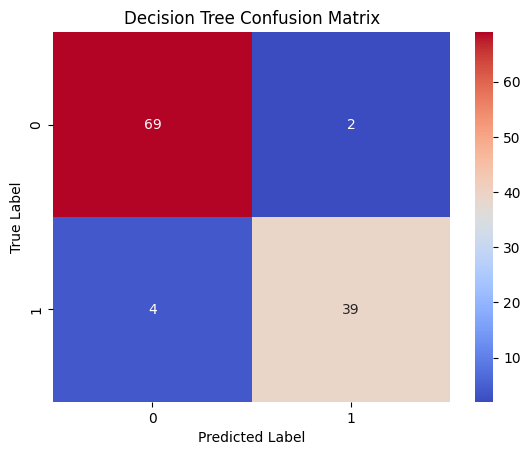


Ð¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· Ð¼Ð¾Ð´ÐµÐ»ÐµÐ¹:
KNN Accuracy: 0.9473684210526315
Decision Tree Accuracy: 0.9473684210526315


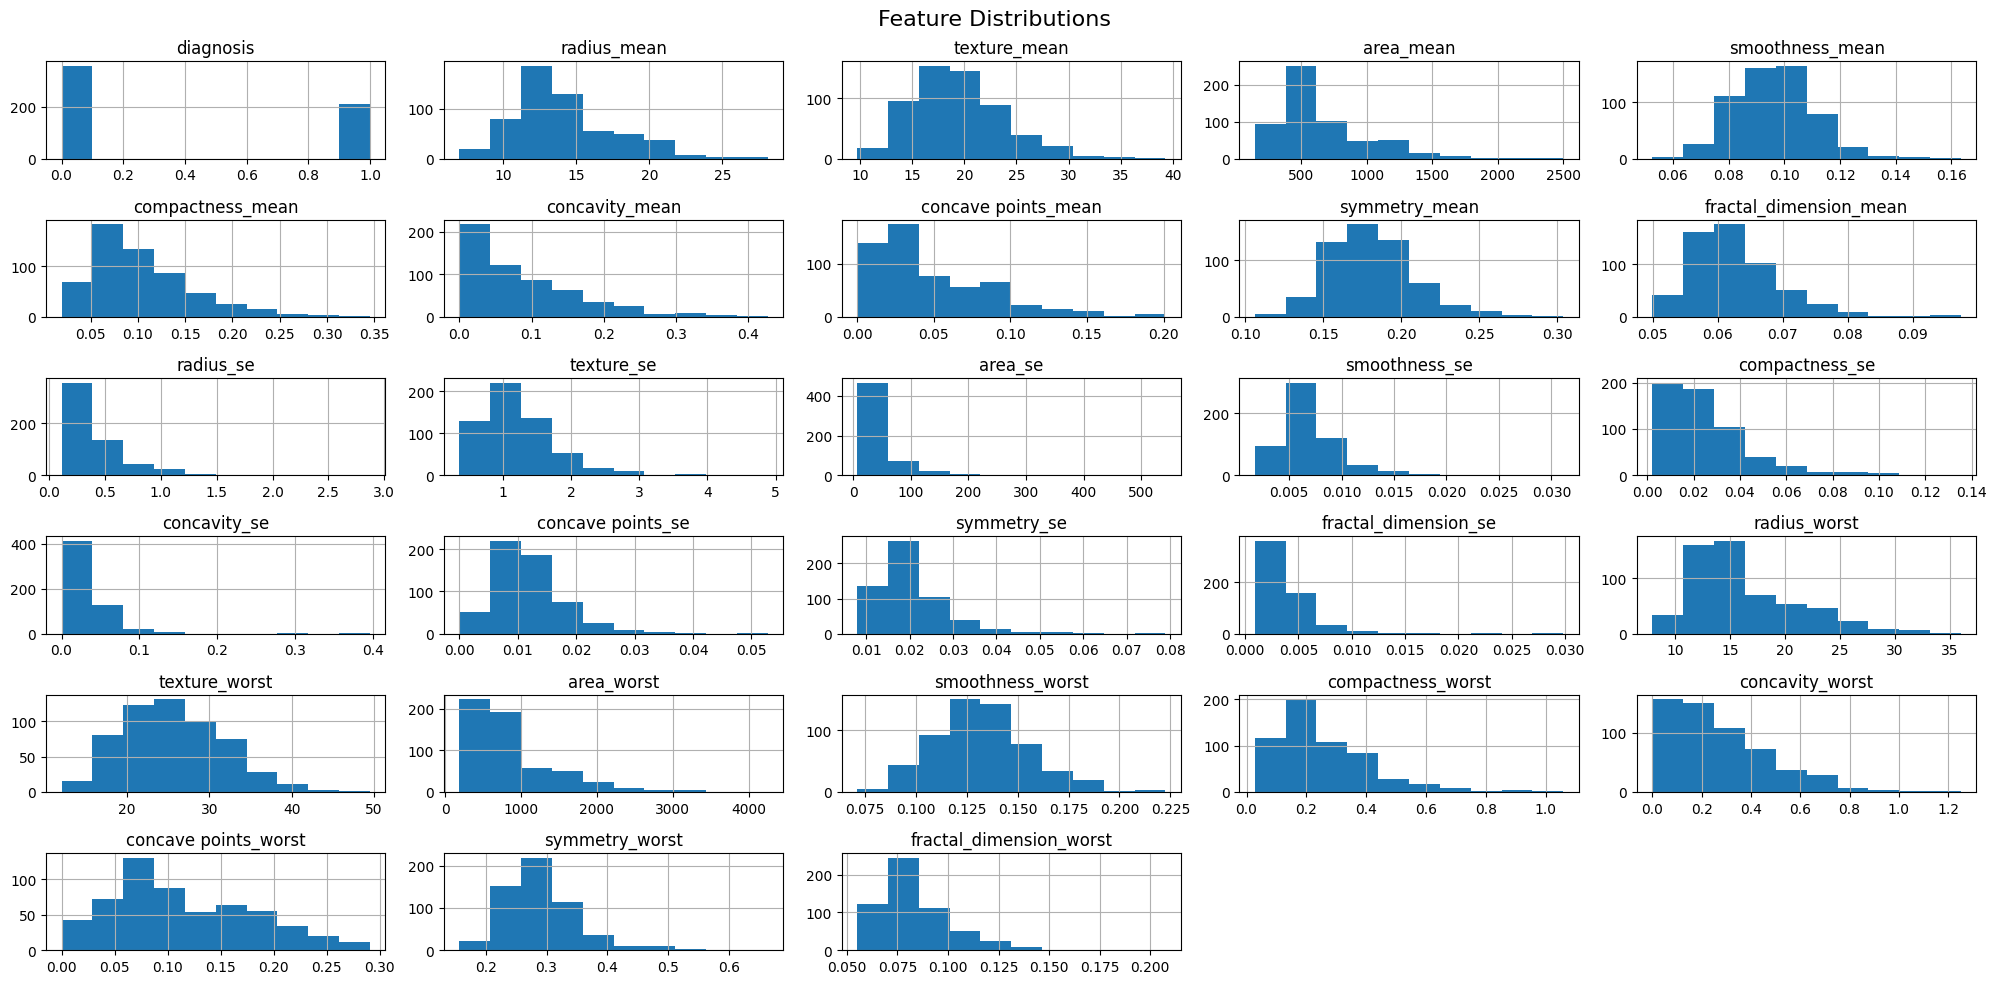

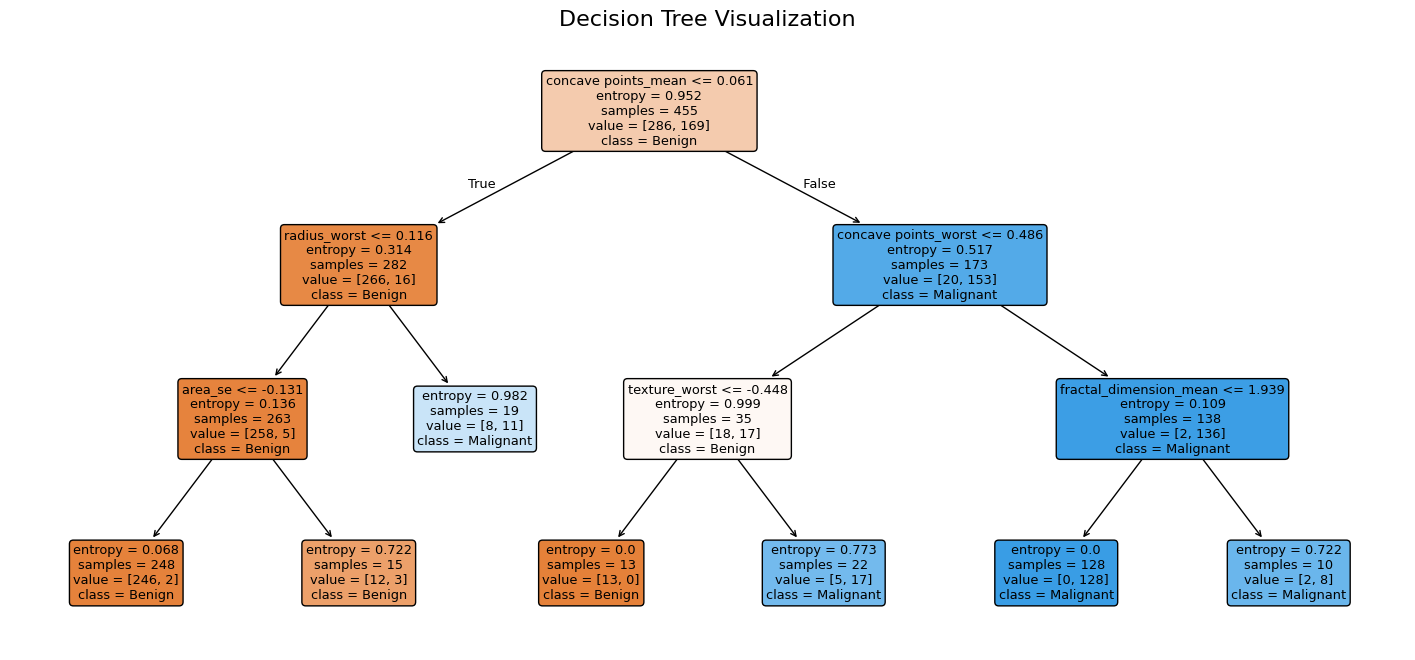

In [14]:

# Ð—Ð°Ð³Ñ€ÑƒÐ·ÐºÐ° Ð´Ð°Ð½Ð½Ñ‹Ñ…
df = pd.read_csv(r'C:\Users\tmas2\breast-cancer.csv')

# Ð£Ð´Ð°Ð»ÐµÐ½Ð¸Ðµ Ð½ÐµÐ½ÑƒÐ¶Ð½Ð¾Ð³Ð¾ ÑÑ‚Ð¾Ð»Ð±Ñ†Ð° 'id'
columns_to_drop = [
    'id',                  
    'perimeter_mean',     
    'perimeter_worst',    
    'perimeter_se'         
]

df = df.drop(columns=columns_to_drop)

# ÐŸÑ€ÐµÐ¾Ð±Ñ€Ð°Ð·Ð¾Ð²Ð°Ð½Ð¸Ðµ Ñ†ÐµÐ»ÐµÐ²Ð¾Ð¹ Ð¿ÐµÑ€ÐµÐ¼ÐµÐ½Ð½Ð¾Ð¹ 'diagnosis' Ð² Ñ‡Ð¸ÑÐ»Ð¾Ð²Ð¾Ð¹ Ñ„Ð¾Ñ€Ð¼Ð°Ñ‚
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Ð’Ñ‹Ð²Ð¾Ð´ Ð¼Ð¾Ð´Ñ‹ Ð¸ ÑÑ€ÐµÐ´Ð½ÐµÐ³Ð¾ Ð·Ð½Ð°Ñ‡ÐµÐ½Ð¸Ñ Ð´Ð»Ñ Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¾Ð²
print("Feature Statistics:")
for col in df.columns:
    if col != 'diagnosis':
        print(f"{col}: Mean = {df[col].mean():.2f}, Mode = {df[col].mode()[0]}")

# ÐŸÑ€Ð¾ÑÐ¼Ð¾Ñ‚Ñ€ Ð¿ÐµÑ€Ð²Ñ‹Ñ… Ð½ÐµÑÐºÐ¾Ð»ÑŒÐºÐ¸Ñ… ÑÑ‚Ñ€Ð¾Ðº Ð´Ð°Ð½Ð½Ñ‹Ñ…
print(df.head())

# Ð Ð°Ð·Ð´ÐµÐ»ÐµÐ½Ð¸Ðµ Ð´Ð°Ð½Ð½Ñ‹Ñ… Ð½Ð° Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¸ (X) Ð¸ Ñ†ÐµÐ»ÐµÐ²ÑƒÑŽ Ð¿ÐµÑ€ÐµÐ¼ÐµÐ½Ð½ÑƒÑŽ (y)
X = df.drop('diagnosis', axis=1)  # ÐŸÑ€Ð¸Ð·Ð½Ð°ÐºÐ¸
y = df['diagnosis']  # Ð¦ÐµÐ»ÐµÐ²Ð°Ñ Ð¿ÐµÑ€ÐµÐ¼ÐµÐ½Ð½Ð°Ñ

# ÐÐ¾Ñ€Ð¼Ð°Ð»Ð¸Ð·Ð°Ñ†Ð¸Ñ Ð´Ð°Ð½Ð½Ñ‹Ñ…
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ð Ð°Ð·Ð´ÐµÐ»ÐµÐ½Ð¸Ðµ Ð´Ð°Ð½Ð½Ñ‹Ñ… Ð½Ð° Ð¾Ð±ÑƒÑ‡Ð°ÑŽÑ‰ÑƒÑŽ Ð¸ Ñ‚ÐµÑÑ‚Ð¾Ð²ÑƒÑŽ Ð²Ñ‹Ð±Ð¾Ñ€ÐºÐ¸
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ÐœÐ¾Ð´ÐµÐ»ÑŒ KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# ÐœÐ¾Ð´ÐµÐ»ÑŒ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=42, criterion="entropy")
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# ÐžÑ†ÐµÐ½ÐºÐ° Ð¼Ð¾Ð´ÐµÐ»Ð¸ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

# Ð’Ð¸Ð·ÑƒÐ°Ð»Ð¸Ð·Ð°Ñ†Ð¸Ñ Ð¼Ð°Ñ‚Ñ€Ð¸Ñ†Ñ‹ Ð¾ÑˆÐ¸Ð±Ð¾Ðº Ð´Ð»Ñ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='coolwarm')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Ð¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð·
print("\nÐ¡Ñ€Ð°Ð²Ð½Ð¸Ñ‚ÐµÐ»ÑŒÐ½Ñ‹Ð¹ Ð°Ð½Ð°Ð»Ð¸Ð· Ð¼Ð¾Ð´ÐµÐ»ÐµÐ¹:")
print("KNN Accuracy:", (y_pred_knn == y_test).mean())
print("Decision Tree Accuracy:", (y_pred_dt == y_test).mean())

# Ð“Ð¸ÑÑ‚Ð¾Ð³Ñ€Ð°Ð¼Ð¼Ñ‹ Ð´Ð»Ñ Ð¿Ñ€Ð¸Ð·Ð½Ð°ÐºÐ¾Ð²
df.hist(figsize=(20, 10))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

# Ð’Ð¸Ð·ÑƒÐ°Ð»Ð¸Ð·Ð°Ñ†Ð¸Ñ Ð´ÐµÑ€ÐµÐ²Ð° Ñ€ÐµÑˆÐµÐ½Ð¸Ð¹
plt.figure(1, figsize=(18, 8))
plot_tree(dt_model, filled=True, rounded=True, feature_names=X.columns, class_names=["Benign", "Malignant"])
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()
